 # **STROKE PREDICTION**
En este notebook se analizará la información de más de 5,000 pacientes para determinar la relación que tiene su estilo de vida y estado de salud con la probabilidad de que tengan un infarto cerebral. 

&nbsp;Asimismo, se diseñará un modelo que permita conocer la probabilidad de que tengan un infarto cerebral en el futuro considerando sus características actuales a partir del análisis de 11 variables relacionadas con su historial médico y características personales.  

 ![Imagen](https://owh-wh-d9-prod.s3.amazonaws.com/s3fs-public/heading-images/Strokesymptoms.jpg?6_pccH6PiKlRNnknbdAFLZDYu.qNqXcl)

## Introducción
Un Accidente cerebral, ACV, Apoplejía, Ataque cerebral, Derrame cerebral o Infarto cerebral sucede cuando alguno de los vasos sanguíneos que lleva sangre al cerebro se bloquea provocando la muerte de las células cerebrales por la falta de oxígeno.

&nbsp;El cerebro coordina todo lo que hacemos y cuando una parte de él no recibe el oxígeno suficiente, la parte del cuerpo controlada por esa área podría verse afectada provocando discapacidades e incluso la muerte. Entre más prolongado sea el tiempo durante el cuál el cerebro esta privado de oxígeno la discapacidad puede ser más severa y se aumentan las probabilidades de que sea permanente. 

&nbsp;Actualmente, diversos organismos médicos a nivel mundial han buscado sensibilizar a la población sobre este padecimiento para que los pacientes puedan recibir el tratamiento adecuado a tiempo. También se enfatiza en la prevención considerando que los factores que pueden detonarlo frecuentemente se deben a hábitos modificables de los pacientes.

## Miembros del equipo
1. Ángeles Torres
2. Alicia Ortega 
3. Yamileth Cabrera


## Objetivos
1. Analizar la relación del estilo de vida de los pacientes con posibilidad de que tengan un infarto cerebral
2. Diseñar un modelo que permita conocer la probabilidad de que los pacientes tengan un infarto cerebral en función de su estilo de vida y estado de salud


## 1. Data Acquisition

### Fuente de datos
La información para el desarrollo de este notebook se encuentra disponible en la siguiente liga:

&nbsp;https://www.kaggle.com/code/yashwanthreddy27/stroke-prediction-eda-prediction/data

La fuente original proviene de la coleccion de datos del site de la Organizacion Mundial de la Salud https://www.who.int/data/collections. L


#Carga de Dataset

#Descargamos los datos desde un gooogle sheet que esta publicado en la web.
file_name = 'healthcare-dataset-stroke-Data.csv'

def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRLC2b37pdX_0ixfNUSXTixCOhKPTg9h_elP-BOS0ACwgDDdkcc-vPbsTqlzMaUZ5P2lgs4Q8jHIvh0/pub?gid=609789935&single=true&output=csv'
    urllib.request.urlretrieve(url, file_name)
download_file(file_name)

#Guardamos los datos en un  dataframe

stroke = pd.read_csv(file_name)
stroke.head()

### Definición del dataset 
Para cumplir con los objetivos de este trabajo contaremos con la información de 11 variables de relacionadas con características de los pacientes, cómo edad, género, estilo de vida e historial médico. A continuación, se describen cada una de ellas:

* **id**: identificador único por paciente
* **gender**: género del paciente. Hay tres opciones "Male" (hombre), "Female" (mujer) u "Other" (otro)
* **age**: edad del paciente
* **hypertension**: 0 si el paciente no pacede hipertensión y 1 sí la presenta
* **heart_disease**: 0 si el paciente no tiene alguna enfermedad del corazón y 1 si el paciente sí tiene alguna enfermedad del corazón
* **ever_married**:"Yes" si el paciente está casado y "No" si no lo está
* **work_type**: tipo de trabajo del paciente. Las opciones son: "children" (si es un niño), "Govt_jov" (si es un trabajador del gobierno), "Never_worked" (si nunca ha trabajado), "Private" (si trabaja para una empresa privada) o "Self-employed" (si es trabajador por cuenta propia)
* **Residence_type**: tipo de residencia del paciente "Rural" o "Urban" (urbana)
* **avg_glucose_level**: nivel promedio de glucosa en la sangre 
* **bmi**: índice de masa corporal
* **smoking_status**: define si el paciente ha fumado o no. Hay 4 opciones: "formerly smoked" (fumaba en el pasado), "never smoked" (nunca ha fumado), "smokes" (actualmente es fumador) o "Unknown" (no hay información al respecto)
* **stroke**: 1 si el paciente ha tenido un infarto cerebral en el pasado y 0 si nunca ha tenido un infarto cerebral

## 2. Data Wrangling
Para comenzar a trabajar con la información en esta sección empezaremos conociendo y comprendiendo los datos con los que contamos. Posteriormente modelaremos los datos de acuerdo con nuestros propósitos y limpiaremos la información que no sea necesaria para el análisis.

### 2.1 Importar todas las librerias necesarias

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### 2.2 Importar el dataset

In [180]:
stroke= pd.read_csv("C:/Users/alici/Desktop/Cursos/CODER/Proyecto/Data/healthcare-dataset-stroke-data.csv")

### 2.3 Exploración del dataset
En esta sección iniciaremos con una exploración básica del dataset para conocer su estructura. La información que se revisará es: 
* **Estructura general del dataset** a través de la función head
* **Tamaño del dataset** a través de la función shape
* **Información sobre cada de una de las variables** a través de la función info
* **Información sobre datos nulos en la data** a través de la función isnull
* **Identificar si tenemos datos duplicados** a través de la función duplicated

In [181]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [182]:
stroke. shape

(5110, 12)

In [183]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [184]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [185]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [186]:
stroke.duplicated().value_counts()

False    5110
dtype: int64

**A partir de la información que surgió de las líneas anteriores surge la necesidad de revisar con más atención a las siguientes variables:**
* **Género**: En la descripción de las variables identificamos que tenemos la opción de "Other". Considerando que el género influye en las probabilidades de tener un infarto o no, vamos a verificar cuántos registros tenemos de ese tipo para evaluar si vale la pena conservarlo o no.
* **Edad**: Es una variable de tipo flotante. Por el tipo de dato es conveniente que sea un dato de tipo entero, pero antes de proceder a un cambio vamos a revisar si hay decimales en la edad de algún paciente.

**Género**

In [187]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**Conclusión:** Tenemos un solo registro con la opción "Other", podriamos eliminarlo y no tendria un gran impacto en la muestra

**Edad**

In [188]:
pd.options.display.max_rows= None
stroke['age'].sort_values().value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
50.00     83
55.00     83
59.00     80
31.00     79
49.00     79
56.00     77
61.00     76
37.00     76
44.00     75
47.00     75
62.00     74
63.00     74
40.00     74
41.00     73
38.00     72
60.00     72
32.00     71
42.00     71
39.00     71
43.00     70
80.00     70
58.00     68
34.00     68
48.00     66
5.00      65
23.00     64
65.00     62
46.00     62
26.00     62
71.00     61
17.00     60
18.00     60
66.00     60
81.00     60
20.00     59
8.00      58
13.00     57
33.00     57
25.00     57
82.00     56
27.00     55
30.00     55
24.00     55
2.00      55
69.00     54
28.00     54
35.00     54
14.00     54
64.00     53
75.00     53
36.00     52
16.00     52
29.00     51
19.00     50
76.00     50
67.00     49
68.00     47
21.00     47
3.00      46
73.00     46
15.00     45
22.00     45
70.00     45
72.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

In [189]:
pd.options.display.max_rows=15

**Conclusión:** En edades menores a 2 años tenemos varios pacientes con su edad en decimales. Antes de cambiar a entero la variable hay que redondear esas edades.

### 2.4 Conclusiones sobre la exploración del dataset
**Sobre el dataset**
* Dentro de la base hay información de 11 variables que describen el estilo de vida y estado de salud de los pacientes.
* La única variable con datos faltantes es el índice de masa corporal.
* La edad es una variable de tipo flotante y para pacientes menores a dos años tiene decimales.
* No hay información duplicada en el dataset.

**Sobre los pacientes**
* Contamos con la información de 5,100 pacientes.
* El promedio de edad de los pacientes es de 43 años. Tenemos desde niños menores de un año hasta adultos mayores de 82 años
* El promedio de masa corporal de los pacientes es de 29, lo cual corresponde a sobrepeso. Sin embargo, la desviación estándar es alta considerando el rango de movimiento de la variable.
* El promedio de nivel de glucosa de los pacientes es de 109 lo que se considera normal. Sin embargo, la desviación estandar es muy grande. Tenemos pacientes con niveles desde 55 (bajo nivel de glucosa) hasta 271 que indica diabetes.

### 2.5 Estructuración y limpieza

A partir del análisis exploratorio de la información detectamos algunos aspectos que se deben modificar para que podamos trabajar con la información. Los cambios necesarios son los siguientes: 

1. **ID:** La columna de id se considera como una característica más de los pacientes. Dado que el id es nuestro índice lo pasaremos a su columna correspondiente.
2. **Género:** El género es una variable que influye en las probabilidades de que un paciente sufra un infarto o no. Considerando eso tener la opción de "Other" no es útil para nuestro análisis por lo que eliminaremos ese registro.
3. **Edad:** La edad mínima dentro de la información es de 0.08 y esta catalogado como un dato de tipo flotante. Para homogenizar la información de la edad en pacientes con edad en decimales vamos a redondear de acuerdo a las reglas de redondeo. Lo que significa que para pacientes menores a 1 año se homogenizara en 0 años. Posteriormente pasaremos la variable a tipo entero.
4. **Datos nulos:** En la columna del índice de masa corporal hay 201 datos nulos. Para mantener la mayor cantidad de información los conservaremos y remplazaremos los datos faltantes con el promedio del índice de masa corporal de toda la muestra (nivel de 28).

**ID**: Pasar la variable id al índice

In [190]:
stroke.set_index('id', inplace= True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Género**: Eliminar el registro 'Other'

In [191]:
#Primero identificamos el registro que corresponde a 'Other'
stroke[stroke.gender=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [192]:
#Lo borramos
stroke.drop ([56156], axis=0, inplace=True)

In [193]:
#Comprobamos que se haya borrado el registro
stroke[stroke.gender=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


**Edad**: Para edades con decimales redondearlo (0 en caso de que el paciente tenga menos de 1 año) y pasar la variable a tipo entero

In [194]:
#Primero redondeamos los casos que tienen decimales (menores a dos años)
round(stroke[stroke.age<2], 0)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
69768,Female,1.0,0,0,No,children,Urban,70.0,NaN,Unknown,1
7559,Female,1.0,0,0,No,children,Urban,84.0,25.0,Unknown,0
22706,Female,1.0,0,0,No,children,Rural,88.0,16.0,Unknown,0
45238,Female,2.0,0,0,No,children,Urban,58.0,16.0,Unknown,0
61511,Female,0.0,0,0,No,children,Rural,74.0,16.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
32147,Male,1.0,0,0,No,children,Rural,107.0,NaN,Unknown,0
67426,Female,1.0,0,0,No,children,Rural,62.0,20.0,Unknown,0
42709,Male,2.0,0,0,No,children,Urban,77.0,17.0,Unknown,0


In [195]:
#Convierto la variable en tipo entero
stroke['age']=stroke['age'].astype(int)

In [196]:
#Verifico que haya quedado 
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int32  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 459.0+ KB


**Datos Nulos**: completar los valores faltantes con el promedio de índice de masa corporal de la muestra

In [197]:
#¿Cuál será el dato con el que completaremos los valores faltantes?
stroke['bmi'].mean()

28.894559902200488

In [198]:
#Remplazo los valores faltantes
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace=True )

In [199]:
#Verifico que se haya hecho el cambio
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 3. Análisis Exploratorio de Datos o EDA

El Análisis Exploratorio de Datos nos permite examinar la estructura de los datos, así como la relación que existe entre las variables permitiendo detectar datos atípicos, manejar datos ausentes y dar forma al dataset de acuerdo con el objetivo del trabajo. Para realizar este análisis examinaremos las siguientes puntos:
* Outliers
* Datos faltantes
* Correlaciones
* Distribución de las variables

Para ello realizamos 3 tipos de análisis de las variables: indivualmente, en comparación con la variable objetivo y entre ellas. En esta sección abarcaremos el análisis Univariado, Bivariado y Multivariado.

### 3.1 Análisis Univariado
Para comenzar a explorar los datos utilizaremos un análisis univariado en el que revisaremos los siguientes aspectos en cada variables:
1. **Número de registros y categorías** a través de una gráfica de barras 
2. **Distribución de los datos** además de curtosis a través de un histograma
3. **Outliers** a través de box plot

Cabe destacar que en esta sección no incluiremos el análisis de datos faltantes debido a que cómo vimos en la sección anterior la única variable que los tenía era el índice de masa corporal y dichos valores ya fueron remplazados.

**Nota**: Los aspectos que se revisen en cada variable dependeran de la naturaleza de esta. Las conclusiones de esta sección se incluiran al final

#### 3.1.1 Género

&nbsp;Esta variable es dicotómica por lo que únicamente revisaremos la distribución de los datos entre las categorías que la componen (hombres y mujeres)

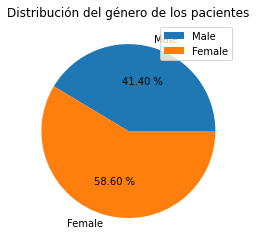

In [200]:
genero= stroke['gender'].value_counts().sort_values()
etiquetas=stroke['gender'].unique()
# etiquetas= ('Femenino','Masculino')
fig, ax=plt.subplots()
plt.pie(genero,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Distribución del género de los pacientes')
ax.legend()
plt.show()

Hay más mujeres que hombres en la muestra. Tenemos un 58% de mujeres contra un 42% de hombres.

#### 3.1.2 Edad

C:\Users\alici\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución de la edad de los pacientes')

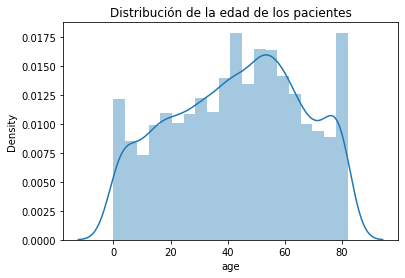

In [201]:
from seaborn import distplot
distplot(stroke.age)
plt.title('Distribución de la edad de los pacientes')

La edad de la que hay más pacientes es 78 años, seguido de 57 y 52 años. Sin embargo su distribución no es del tipo normal sino más bien tiene una forma Platicúrtica

C:\Users\alici\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de la edad de los pacientes')

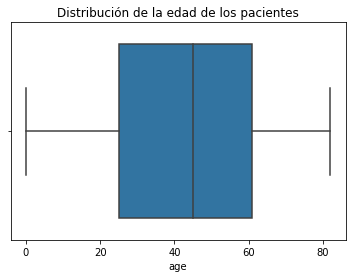

In [202]:
from seaborn import boxplot
boxplot (stroke.age, orient='h')
plt.title('Distribución de la edad de los pacientes')

No hay outliers en esta variable

#### 3.1.3 Hipertensión

&nbsp;Esta variable es dicotómica por lo que únicamente revisaremos la distribución de los datos entre las categorías que la componen en donde muestran si el paciente ha tenido o no hipertensión.

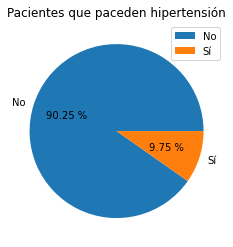

In [203]:
hipertension= stroke['hypertension'].value_counts()
#etiquetas=stroke['hypertension'].unique()
etiquetas= ['No','Sí']
fig, ax=plt.subplots()
plt.pie(hipertension,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Pacientes que paceden hipertensión')
ax.legend()
plt.show()

El 90% de los pacientes no padecen hipertensión

#### 3.1.4 Enfermedades del corazón

&nbsp;Esta variable es dicotómica por lo que únicamente revisaremos la distribución de los datos entre las categorías que la componen en donde muestran si el paciente tiene alguna enfermedad del corazón.

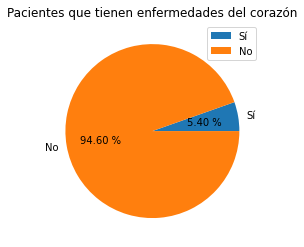

In [204]:
corazon= stroke['heart_disease'].value_counts().sort_values()
#etiquetas=stroke['heart_disease'].unique()
etiquetas= ['Sí','No']
fig, ax=plt.subplots()
plt.pie(corazon,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Pacientes que tienen enfermedades del corazón')
ax.legend()
plt.show()

El 5% de los pacientes padecen una enfermedad del corazón

#### 3.1.5 Estado civil

&nbsp;Esta variable es dicotómica por lo que únicamente revisaremos la distribución de los datos entre las categorías que la componen: Yes si el pacientes es casado y No si no lo esta

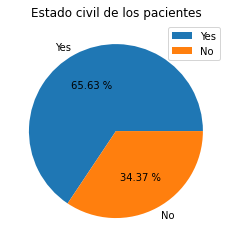

In [205]:
casado= stroke['ever_married'].value_counts()
etiquetas= stroke['ever_married'].unique()
#etiquetas= ["Alguna vez casado","Soltero"]
fig, ax=plt.subplots()
plt.pie(casado,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Estado civil de los pacientes')
ax.legend()
plt.show()

El 66% de los pacientes están casados

#### 3.1.6 Tipo de trabajo

&nbsp;A través de esta variable identificaremos la ocupación de los pacientes. Al ser una variable categórica solo identificaremos la distribución de ocupaciones entre los pacientes

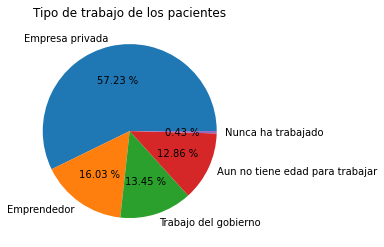

In [206]:
trabajo= stroke['work_type'].value_counts().sort_values(ascending=False)
etiquetas= stroke['work_type'].unique()
etiquetas=['Empresa privada','Emprendedor', 'Trabajo del gobierno','Aun no tiene edad para trabajar','Nunca ha trabajado']
fig, ax=plt.subplots()
plt.pie(trabajo,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Tipo de trabajo de los pacientes')
plt.show()

La mayor parte de los empleados (58%) trabajan en el sector privado seguido del 16% que son trabajadores por cuenta propia.

#### 3.1.7 Tipo de residencia

&nbsp;Con esta variable categorica identificaremos si los pacientes viven en zonas rurales o urbanas

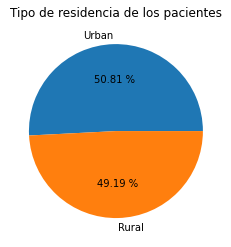

In [207]:
residencia= stroke['Residence_type'].value_counts()
etiquetas= stroke['Residence_type'].unique()
fig, ax=plt.subplots()
plt.pie(residencia,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Tipo de residencia de los pacientes')
plt.show()

El 51% de los pacientes viven en zonas urbanas contra el 49% que esta en zonas rurales

#### 3.1.8 Niveles de glucosa

Text(0.5, 1.0, 'Niveles de glucosa más comunes en los pacientes')

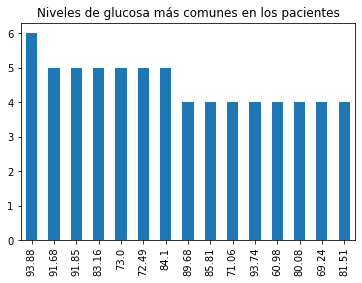

In [208]:
stroke['avg_glucose_level'].value_counts().head(15).plot.bar()
plt.title('Niveles de glucosa más comunes en los pacientes')

La mayor parte de los pacientes tienen niveles de glucosa de entre 84-94

C:\Users\alici\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución de los niveles de glucosa de los pacientes')

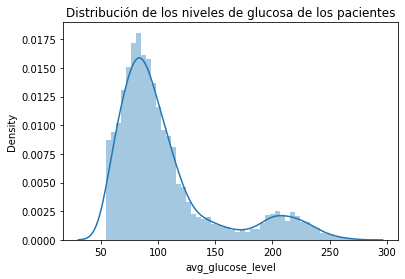

In [209]:
from seaborn import distplot
distplot(stroke.avg_glucose_level)
plt.title('Distribución de los niveles de glucosa de los pacientes')

La distribución de la variable se divide en dos partes. Por un lado, tenemos un pico en 90 con una forma leptocúrtica y otro pico en 210 con una forma más Platicúrtica

C:\Users\alici\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de los niveles de glucosa de los pacientes')

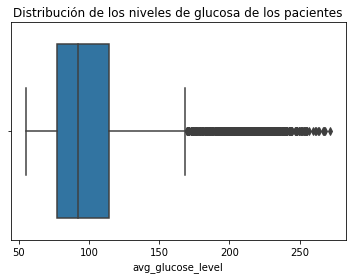

In [210]:
from seaborn import boxplot
boxplot (stroke.avg_glucose_level, orient='h')
plt.title('Distribución de los niveles de glucosa de los pacientes')

Esta variable tiene un caso importante de outliers lo que explica la elevada desviación estándar de la variable.

##### 3.1.8.1 Corrección de outliers en los niveles de glucosa

In [211]:
#Primero vamos a revisar las caracterisicas de la variable
stroke.avg_glucose_level.describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Considerando que los pacientes con niveles mayores a 121 puntos se consdiera que tienen diabetes y a fin de evitar que los outliers sesgen los resultados del modelo vamos a remplazar el nivel de glucosa de todos los pacientes con niveles mayores o iguales a 150 puntos se replazaran por 150

In [212]:
#Comienzo identificando los casos de pacientes con niveles mayores o iguales a 150 puntos
stroke[stroke.avg_glucose_level>=150]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
68967,Male,39,0,0,Yes,Private,Urban,179.38,27.70000,Unknown,0
66684,Male,70,0,0,Yes,Self-employed,Rural,193.88,24.30000,Unknown,0
39935,Female,34,0,0,Yes,Private,Rural,174.37,23.00000,never smoked,0


In [213]:
stroke.loc[stroke.avg_glucose_level>=150,'avg_glucose_level']=150
stroke[stroke.avg_glucose_level>=150]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,150.0,36.60000,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,150.0,28.89456,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,150.0,34.40000,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,150.0,24.00000,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,150.0,29.00000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
68967,Male,39,0,0,Yes,Private,Urban,150.0,27.70000,Unknown,0
66684,Male,70,0,0,Yes,Self-employed,Rural,150.0,24.30000,Unknown,0
39935,Female,34,0,0,Yes,Private,Rural,150.0,23.00000,never smoked,0


C:\Users\alici\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de los niveles de glucosa de los pacientes AJUSTADO')

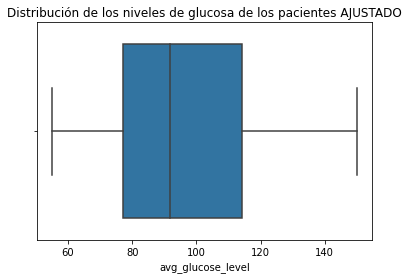

In [214]:
#Compruebo el cambio con el boxplot
from seaborn import boxplot
boxplot (stroke.avg_glucose_level, orient='h')
plt.title('Distribución de los niveles de glucosa de los pacientes AJUSTADO')

#### 3.1.9 Índice de Masa Corporal

Text(0.5, 1.0, 'Indices de masa corporal más comunes de los pacientes')

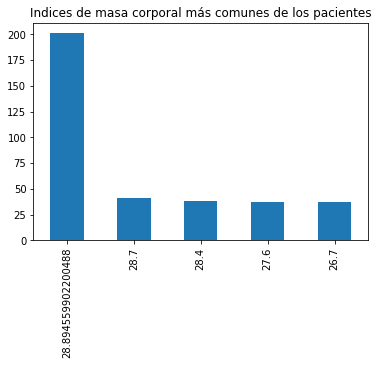

In [215]:
stroke['bmi'].value_counts().head(5).plot.bar()
plt.title('Indices de masa corporal más comunes de los pacientes')

La mayor parte de los pacientes tienen sobrepeso que corresponde a niveles entre 26-28. 

C:\Users\alici\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del índice de masa corporal de los pacientes')

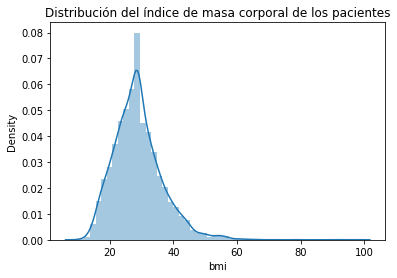

In [216]:
from seaborn import distplot
distplot(stroke.bmi)
plt.title('Distribución del índice de masa corporal de los pacientes')

C:\Users\alici\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución del índice de masa corporal de los pacientes')

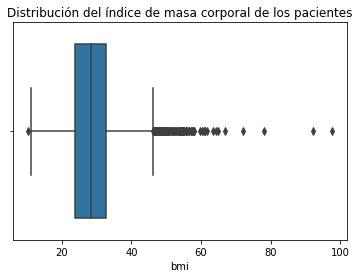

In [217]:
from seaborn import boxplot
boxplot (stroke.bmi, orient='h')
plt.title('Distribución del índice de masa corporal de los pacientes')

A pesar de que la distribución tiene una forma leptocúrtica la desviación a la media es muy grande por la cantidad de outliers que tiene la variable

##### 3.1.8.1 Corrección de outliers en el Índice de Masa Corporal

In [218]:
#Primero vamos a revisar las caracterisicas de la variable
stroke.bmi.describe()

count    5109.000000
mean       28.894560
std         7.698235
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Considerando que los pacientes con niveles mayores a 30 puntos se consdiera que tienen obesidad y a fin de evitar que los outliers sesgen los resultados del modelo vamos a remplazar el índice de masa corporal de todos los pacientes con niveles mayores o iguales a 30 puntos se replazaran por 45

In [219]:
#Comienzo identificando los casos que pacientes con niveles mayores o iguales a 30 puntos
stroke[stroke.bmi>=30]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,150.00,36.6,formerly smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,150.00,34.4,smokes,1
12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
58202,Female,50,1,0,Yes,Self-employed,Rural,150.00,30.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
56799,Male,76,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
64520,Male,68,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
22127,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0


In [220]:
stroke.loc[stroke.bmi>=30,'bmi']=45
stroke[stroke.bmi>=30]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,150.00,45.0,formerly smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,45.0,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,150.00,45.0,smokes,1
12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,45.0,smokes,1
58202,Female,50,1,0,Yes,Self-employed,Rural,150.00,45.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
56799,Male,76,0,0,Yes,Govt_job,Urban,82.35,45.0,never smoked,0
64520,Male,68,0,0,Yes,Self-employed,Urban,91.68,45.0,Unknown,0
22127,Female,18,0,0,No,Private,Urban,82.85,45.0,Unknown,0


C:\Users\alici\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución del índice de masa corporal de los pacientes AJUSTADO')

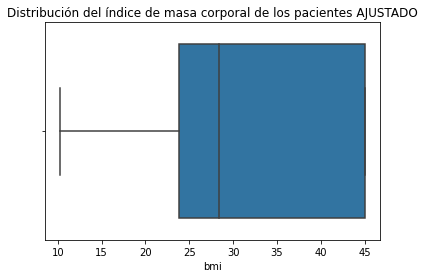

In [221]:
#Compruebo el cambio con el boxplot
boxplot (stroke.bmi, orient='h')
plt.title('Distribución del índice de masa corporal de los pacientes AJUSTADO')

#### 3.1.10 Hábito de fumar

&nbsp;Esta variable es dicotómica por lo que únicamente revisaremos la distribución de los datos entre las categorías que la componen en donde muestran si el paciente tiene el hábito de fumar o si no tenemos información al respecto

In [222]:
fumar= stroke['smoking_status'].value_counts().sort_values(ascending=False)
fumar

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

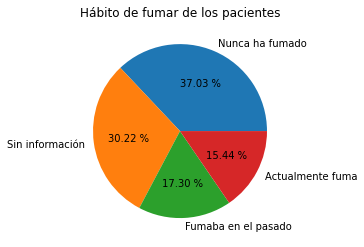

In [223]:
fumar= stroke['smoking_status'].value_counts().sort_values(ascending=False)
#etiquetas= stroke['smoking_status'].unique()
etiquetas= ['Nunca ha fumado', 'Sin información', 'Fumaba en el pasado', 'Actualmente fuma']
fig, ax=plt.subplots()
plt.pie(fumar,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Hábito de fumar de los pacientes')
plt.show()

El 37% de los pacientes nunca ha fumado, 30% no hay información, 17% fumaban el pasado y del 16% de los pacientes tienen el hábito de fumar actualmente

#### 3.1.11 Antecedente de infarto cerebral

&nbsp;Esta variable es dicotómica por lo que únicamente revisaremos la distribución de los datos entre las categorías que la componen en donde muestran si el paciente ha tenido un infarto en el pasado.

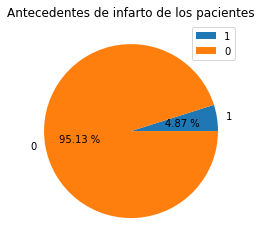

In [224]:
infarto= stroke['stroke'].value_counts().sort_values()
etiquetas= stroke['stroke'].unique()
#etiquetas= ['Sí', 'No']
fig, ax=plt.subplots()
plt.pie(infarto,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Antecedentes de infarto de los pacientes')
ax.legend()
plt.show()

El 5% de los pacientes han sufrido algún ACV en el pasado

#### 3.1.12 Insights del análisis univariado
La muestra está compuesta mayormente por mujeres mayores de 50 años. La mayoría están casadas y trabajan en el sector privado. Sobre su estado de salud la mayoría de los pacientes no han sufrido algún ACV en el pasado, tienen sobrepeso, sus niveles de glucosa son normales , no tienen enfermedades del corazón ni hipertensión.

### 3.2 Análisis bivariado 
Dentro de esta sección analizaremos cómo influyen variables independientes sobre nuestra variable dependiente, que en este caso es que el paciente haya sufrido algún infarto cerebral. Para realizar este análisis comúnmente se utilizan herramientas gráficas que nos permitan identificar la correlación entre la variable dependiente con la independiente. Sin embargo, dada las características de nuestra variable dependiente, al tratarse de una variable categórica, el uso de gráficas limita el análisis por lo que se dará preferencia al uso de tablas cruzadas y agrupadas. 

**Nota 1:** A esta altura del análisis únicamente verificaremos la correlación de las variables sin tomar en cuenta si la variable tiene significancia estadística con la variable dependiente. Dicho estudio se realizará en secciones posteriores. 

&nbsp;**Nota 2:** Para realizar las tablas agrupadas se utilizarán las siguientes segmentaciones:

**Rangos de edad**
* 0-14 niños
* 15-24 jóvenes
* 25-64 adultos
* Mayor a 65 adultos mayores

**Niveles de glucosa**
* menor a 79 hipoglucemia
* 80- 100 normal
* 101-120 prediabetes
* Mayor a 121 diabetes

**Índice de Masa Corporal**

* menor a 18.5 Peso bajo
* 18.5-24.9 Normal
* 25-29.9 Sobrepeso
* Mayor a 30 Obesidad

#### 3.2.1 Relación entre el género del paciente y antecedentes de infarto cerebral

In [225]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.gender,margins=True,margins_name="Total")

gender,Female,Male,Total
stroke,,,
0,2853,2007,4860
1,141,108,249
Total,2994,2115,5109


In [226]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.gender, normalize= 'columns'))*100

gender,Female,Male
stroke,,
0,95.290581,94.893617
1,4.709419,5.106383


El género no impacta el número de pacientes que han sufrido un infarto cerebral. El 5% de pacientes mujeres han tenido un infarto cerebral al igual que el 5% de hombres

#### 3.2.2 Relación entre la edad del paciente y antecedentes de infarto cerebral

In [227]:
#Agregamos la columna de Grupo de edad para poder agrupar
stroke['grupo_edad']= pd.cut(stroke.age, 
                                bins= [-1, 14,24,64,100], 
                                labels=["ninos","jóvenes","adultos", "adultos mayores"])
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,grupo_edad
id,,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,150.00,45.00000,formerly smoked,1,adultos mayores
51676,Female,61,0,0,Yes,Self-employed,Rural,150.00,28.89456,never smoked,1,adultos
31112,Male,80,0,1,Yes,Private,Rural,105.92,45.00000,never smoked,1,adultos mayores
60182,Female,49,0,0,Yes,Private,Urban,150.00,45.00000,smokes,1,adultos
1665,Female,79,1,0,Yes,Self-employed,Rural,150.00,24.00000,never smoked,1,adultos mayores


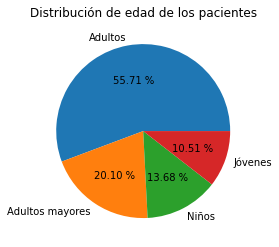

In [228]:
Grupo_de_edad= stroke['grupo_edad'].value_counts().sort_values(ascending=False)
#etiquetas= stroke['grupo_edad'].unique()
etiquetas= ('Adultos', 'Adultos mayores', "Niños", 'Jóvenes')
fig, ax=plt.subplots()
plt.pie(Grupo_de_edad,labels=etiquetas, autopct='%0.2f %%')
ax.set_title('Distribución de edad de los pacientes')
plt.show()

In [229]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.grupo_edad,margins=True,margins_name="Total")

grupo_edad,ninos,jóvenes,adultos,adultos mayores,Total
stroke,,,,,
0,697,537,2758,868,4860
1,2,0,88,159,249
Total,699,537,2846,1027,5109


In [230]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.grupo_edad, normalize= 'columns'))*100

grupo_edad,ninos,jóvenes,adultos,adultos mayores
stroke,,,,
0,99.713877,100.0,96.907941,84.518014
1,0.286123,0.0,3.092059,15.481986


Entre mayor la edad aumenta el número de pacientes que han sufrido un infarto cerebral. En niños solo hay 0.3% de casos, adultos 3% y adultos mayores 15% 

#### 3.2.3 Relación entre que el paciente padezca hipertensión y antecedentes de infarto cerebral

In [231]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.hypertension,margins=True,margins_name="Total")

hypertension,0,1,Total
stroke,,,
0,4428,432,4860
1,183,66,249
Total,4611,498,5109


In [232]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.hypertension, normalize= 'columns'))*100

hypertension,0,1
stroke,,
0,96.03123,86.746988
1,3.96877,13.253012


Tener hipertensión aumenta las probabilidades de infarto cerebral. Los pacientes con hipertensión que han tenido infartos cerebrales son 13% mientras que aquellos que no tienen esta enfermedad solo el 4% han tenido un infarto. 

#### 3.2.4 Relación entre que el paciente padezca enfermedades del corazón y antecedentes de infarto cerebral

In [233]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.heart_disease,margins=True,margins_name="Total")

heart_disease,0,1,Total
stroke,,,
0,4631,229,4860
1,202,47,249
Total,4833,276,5109


In [234]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.heart_disease, normalize= 'columns'))*100

heart_disease,0,1
stroke,,
0,95.820401,82.971014
1,4.179599,17.028986


Las enfermedades del corazón aumentan las probabilidades de infarto cerebral. Los pacientes con enfermedades del corazón que han tenido infartos cerebrales son 17% contra el 4% de pacientes que no tienen esta enfermedad y han tenido un infarto cerebral. 

#### 3.2.5 Relación entre el estado civil del paciente y antecedentes de infarto cerebral

In [235]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.ever_married,margins=True,margins_name="Total")

ever_married,No,Yes,Total
stroke,,,
0,1727,3133,4860
1,29,220,249
Total,1756,3353,5109


In [236]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.ever_married, normalize= 'columns'))*100

ever_married,No,Yes
stroke,,
0,98.348519,93.438712
1,1.651481,6.561288


Estar casado aumenta las probabilidades de infarto cerebral. El 6% de los pacientes han estado casados tuvieron un infarto cerebral contra el 2% de pacientes que lo tuvo estando soltero

#### 3.2.6 Relación entre el tipo de trabajo del paciente y antecedentes de infarto cerebral

In [237]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.work_type,margins=True,margins_name="Total")

work_type,Govt_job,Never_worked,Private,Self-employed,children,Total
stroke,,,,,,
0,624,22,2775,754,685,4860
1,33,0,149,65,2,249
Total,657,22,2924,819,687,5109


In [238]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.work_type, normalize= 'columns'))*100

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,94.977169,100.0,94.904241,92.063492,99.708879
1,5.022831,0.0,5.095759,7.936508,0.291121


Los trabajadores por cuenta propia son los que reportan más casos de antecedente de infarto cerebral con 8%.Los pacientes que trabajan en el gobierno y en empresas privadas tuvieron el mismo porcentaje de incidencia de infartos cerebrales del 5%. Los niños y las personas que nunca han trabajado nunca han tenido un infarto cerebral.

#### 3.2.7 Relación entre el tipo de residencia del paciente y antecedentes de infarto cerebral

In [239]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.Residence_type,margins=True,margins_name="Total")

Residence_type,Rural,Urban,Total
stroke,,,
0,2399,2461,4860
1,114,135,249
Total,2513,2596,5109


In [240]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.Residence_type, normalize= 'columns'))*100

Residence_type,Rural,Urban
stroke,,
0,95.463589,94.799692
1,4.536411,5.200308


El lugar en donde viven no impacta el número de pacientes que han sufrido un infarto cerebral. El 5% de pacientes de zonas urbanas han tenido un infarto cerebral al igual que el 5% de zonas rurales

#### 3.2.8 Relación entre los niveles de glucosa del paciente y antecedentes de infarto cerebral

In [241]:
#Agregamos la columna de nivel de gluicosa para poder agrupar
stroke['nivel_glucosa']= pd.cut(stroke.avg_glucose_level, 
                                bins= [0, 79,100,120,500], 
                                labels=["hipoglucemia","normal","prediabetes", "diabetes"])
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,grupo_edad,nivel_glucosa
id,,,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,150.00,45.00000,formerly smoked,1,adultos mayores,diabetes
51676,Female,61,0,0,Yes,Self-employed,Rural,150.00,28.89456,never smoked,1,adultos,diabetes
31112,Male,80,0,1,Yes,Private,Rural,105.92,45.00000,never smoked,1,adultos mayores,prediabetes
60182,Female,49,0,0,Yes,Private,Urban,150.00,45.00000,smokes,1,adultos,diabetes
1665,Female,79,1,0,Yes,Self-employed,Rural,150.00,24.00000,never smoked,1,adultos mayores,diabetes


In [242]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.nivel_glucosa, normalize= 'columns'))*100

nivel_glucosa,hipoglucemia,normal,prediabetes,diabetes
stroke,,,,
0,95.688456,97.046663,95.930233,90.876565
1,4.311544,2.953337,4.069767,9.123435


Los pacientes con diabetes tienen más antecedentes de infarto cerebral (9%) contra el 3% de los pacientes con niveles normales que han sufrido algún infarto cerebral. Asimismo, tener niveles bajos de glucosa (hipoglucemia) también aumenta los casos de pacientes que han padecido un infarto cerebral en 4% de los casos 

#### 3.2.9 Relación entre el índice de masa corporal del paciente y antecedentes de infarto cerebral

In [243]:
#Agregamos la columna de nivel de imc para poder agrupar
stroke['nivel_imc']= pd.cut(stroke.bmi, 
                                bins= [0,18.4,24.9,29.9,100], 
                                labels=["Peso bajo","Normal","Sobrepeso", "Obesidad"])
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,grupo_edad,nivel_glucosa,nivel_imc
id,,,,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,150.00,45.00000,formerly smoked,1,adultos mayores,diabetes,Obesidad
51676,Female,61,0,0,Yes,Self-employed,Rural,150.00,28.89456,never smoked,1,adultos,diabetes,Sobrepeso
31112,Male,80,0,1,Yes,Private,Rural,105.92,45.00000,never smoked,1,adultos mayores,prediabetes,Obesidad
60182,Female,49,0,0,Yes,Private,Urban,150.00,45.00000,smokes,1,adultos,diabetes,Obesidad
1665,Female,79,1,0,Yes,Self-employed,Rural,150.00,24.00000,never smoked,1,adultos mayores,diabetes,Normal


In [244]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.nivel_imc, normalize= 'columns'))*100

nivel_imc,Peso bajo,Normal,Sobrepeso,Obesidad
stroke,,,,
0,99.703264,97.181965,92.857143,94.895833
1,0.296736,2.818035,7.142857,5.104167


Un elevado índice de masa corporal aumenta el número de casos de pacientes que tienen de antecedente casos de ACV. La mayoria de los casos se centra en aquellos que tienen sobrepeso

#### 3.2.10 Relación entre el hábito de fumar del paciente y antecedentes de infarto cerebral

In [245]:
#Tabla agrupada de número de pacientes
pd.crosstab(stroke.stroke, stroke.smoking_status, margins=True,margins_name="Total")

smoking_status,Unknown,formerly smoked,never smoked,smokes,Total
stroke,,,,,
0,1497,814,1802,747,4860
1,47,70,90,42,249
Total,1544,884,1892,789,5109


In [246]:
#Tabla agrupada de porcentaje de pacientes
(pd.crosstab(stroke.stroke, stroke.smoking_status, normalize= 'columns'))*100

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,96.955959,92.081448,95.243129,94.676806
1,3.044041,7.918552,4.756871,5.323194


Los pacientes que fumaron tiene el 8% de los casos de infartos cerebrales contra el 5% de pacientes que fuman actualmente que es el mismo número de casos que aquellos que nunca han fumado

#### 3.2.11 Matriz de corrleaciones

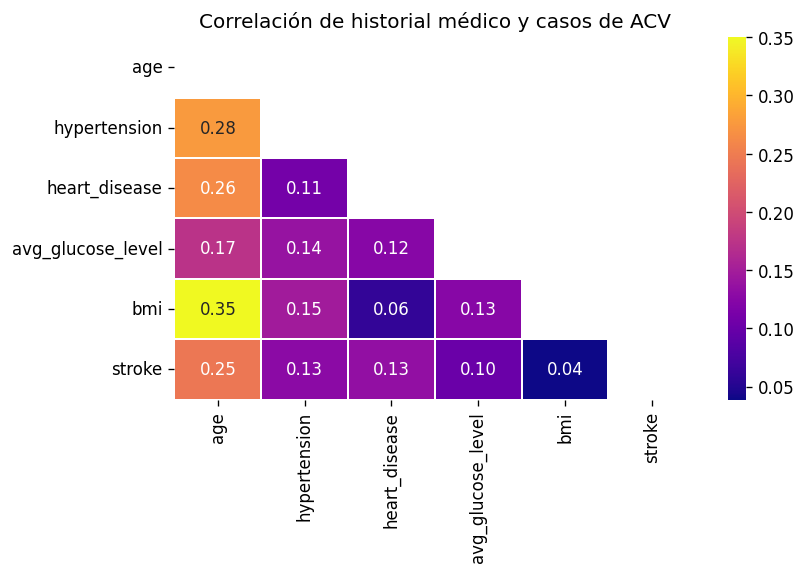

In [247]:
plt.figure(dpi =120,figsize= (7,4))
mask = np.triu(np.ones_like(stroke.corr(),dtype = bool))
sns.heatmap(stroke.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlación de historial médico y casos de ACV')
plt.show()

De las variables numéricas de la base la que tiene mayor correlación es la edad. Las características del estado de salud del paciente (hipertensión y enfermedades del corazón) tienen la misma correlación mientras que el nivel de glucosa junto con el índice de masa corporal son los que menos se correlacionan

#### 3.2.12 Insights del análisis bivariado
* De acuerdo con la información médica existente las probabilidades de que una persona con problemas cardíacos, diabetes,  colesterol alto y el tabaquismo tuvieran algún infarto cerebrales alta. El análisis de la muestra demuestra que efectivamente los pacientes con esas características presentan más casos de infartos cerebrales.
* Algunos estudios sugieren que los hombres presentan mayores casos de infartos cerebrales, sin embargo en nuestra muestra el género no influye en el número de casos.
* Uno de los factores por los que se incrementan los casos de infartos cerebrales es por el tabaquismo. En este caso vemos que efectivamente aquellos pacientes que han fumado en el pasado presentan mayor número de casos.

### 3.3 Análisis Multivariado
El análisis multivariado es la última forma en que se puede estudiar la relación entre las variables. En esta sección revisaremos la relación de dos variables con nuestra variable dependiente. En este caso considerando las variables con las que contamos agruparemos en tres categorías para analizar su relación con la variable dependiente:
* Información del paciente: género y edad
* Estado de salud: hipertensión, enfermedades del corazón, niveles de glucosa e índice de masa corporal
* Estilo de vida: estado civil, tipo de trabajo, tipo de residencia y hábito de fumar

#### 3.3.1 Relación entre la información del paciente con el antecedente de infarto cerebral

In [248]:
pd.crosstab([stroke.stroke,stroke.grupo_edad],stroke.gender,margins=True,margins_name="Total")

gender                  Female  Male  Total
stroke grupo_edad                          
0      ninos               329   368    697
       jóvenes             332   205    537
       adultos            1675  1083   2758
       adultos mayores     517   351    868
1      ninos                 2     0      2
       adultos              46    42     88
       adultos mayores      93    66    159
Total                     2994  2115   5109

Las mujeres reportan más casos de infartos cerebrales que los hombres, los cuales aumentan conforme se incrementa la edad. En niñas hay 2 casos por 0 de niños, en adultos 46 de mujeres vs 42 de hombres y en adultos mayores 93 de mujeres vs 66 de hombres. 

#### 3.3.2 Relación entre el estado de salud del paciente con el antecedente de infarto cerebral

##### 3.3.2.1 Relación entre la hipertensión, las enfermedades del corazón y los antecedentes de infarto cerebral

In [249]:
pd.crosstab([stroke.stroke,stroke.hypertension],stroke.heart_disease,margins=True,margins_name="Total")

heart_disease           0    1  Total
stroke hypertension                  
0      0             4250  178   4428
       1              381   51    432
1      0              149   34    183
       1               53   13     66
Total                4833  276   5109

Cuando un paciente tiene hipertensión y también este enfermo del corazón disminuyen los casos de infarto (13 casos). A diferencia de aquellos que tiene hipertensión, pero no enfermedades del corazón (53 casos) y de aquellos que no tienen hipertensión, pero sí enfermedades del corazón (34 casos)

##### 3.3.2.2 Relación entre la hipertensión, los niveles de glucosa y los antecedentes de infarto cerebral

In [250]:
pd.crosstab([stroke.stroke,stroke.hypertension],stroke.nivel_glucosa,margins=True,margins_name="Total") 

nivel_glucosa        hipoglucemia  normal  prediabetes  diabetes  Total
stroke hypertension                                                    
0      0                     1281    1535          755       857   4428
       1                       95     108           70       159    432
1      0                       42      41           31        69    183
       1                       20       9            4        33     66
Total                        1438    1693          860      1118   5109

Los casos de pacientes de tienen antecedentes de ACV, elevados niveles de glucosa (diabetes) e hipertensión son menos que aquellos con las mismas caracteristicas pero sin hipertensión (33 casos vs 69 casos). Los mismo sucede para pacientes con antecedentes de ACV, niveles bajos y normales de glucosa, los casos disminuyen si padece hipertensión y aumentan si no la tiene.

##### 3.3.2.3 Relación entre la hiptertensión,  el índice de masa corporal y los antecedentes de infarto cerebral

In [251]:
pd.crosstab([stroke.stroke,stroke.hypertension],stroke.nivel_imc,margins=True,margins_name="Total") 

nivel_imc            Peso bajo  Normal  Sobrepeso  Obesidad  Total
stroke hypertension                                               
0      0                   334    1161       1357      1576   4428
       1                     2      46        138       246    432
1      0                     1      26         88        68    183
       1                     0       9         27        30     66
Total                      337    1242       1610      1920   5109

Los pacientes que padecen hipertensión y también elevados niveles de índice de masa corporal pero sin antecedentes de ACV son menos que aquellos tienen las mismas caracteristicas pero con antecedentes de ACV. La disminución más grande es en pacientes con obesidad e hipertensión pero sin antecedentes con 246 casos vs 30 casos con las mismas caracteristicas pero con antedentes de ACV

##### 3.3.2.4 Relación entre las enfermedades del corazón, los niveles de glucosa y los antecedentes de infarto cerebral

In [252]:
pd.crosstab([stroke.stroke,stroke.heart_disease],stroke.nivel_glucosa,margins=True,margins_name="Total") 

nivel_glucosa         hipoglucemia  normal  prediabetes  diabetes  Total
stroke heart_disease                                                    
0      0                      1331    1582          795       923   4631
       1                        45      61           30        93    229
1      0                        54      47           29        72    202
       1                         8       3            6        30     47
Total                         1438    1693          860      1118   5109

Cuando un paciente tiene diabetes, antecedentes de ACV pero no enfermedades del corazón hay 72 casos, pero cuando el paciente sí tiene enfermedades del corazón los casos disminuyen a 30. Los mismo sucede para niveles bajos y normales de glucosa, los casos disminuyen si el paciente tiene enfermedades del corazón. La disminución más grande se da en pacientes con niveles normales de glucosa que si no tienen enfermedades del corazón hay 47 casos, pero sí están enfermos disminuye a solo 3 casos

##### 3.3.2.5 Relación entre las enfermedades del corazón, el índice de masa corporal y los antecedentes de infarto cerebral

In [253]:
pd.crosstab([stroke.stroke,stroke.heart_disease],stroke.nivel_imc,margins=True,margins_name="Total") 

nivel_imc             Peso bajo  Normal  Sobrepeso  Obesidad  Total
stroke heart_disease                                               
0      0                    336    1178       1393      1724   4631
       1                      0      29        102        98    229
1      0                      1      31         94        76    202
       1                      0       4         21        22     47
Total                       337    1242       1610      1920   5109

Los pacientes que padecen enfermedades del corazón y también elevados niveles de índice de masa corporal pero no antecedentes de ACV son menos que aquellos con las mismas enfermedades pero con antecedentes de ACV. La disminución más grande es en pacientes con sobrepeso y enfermedades del corazón pero sin antecedentes de ACV con 102 casos vs 21 de aquellos con las mismas enfermedades pero con antecedentes de ACV. 

##### 3.3.2.6 Relación entre los niveles de glucosa, el índice de masa corporal  y los antecedentes de infarto cerebral

In [254]:
pd.crosstab([stroke.stroke,stroke.nivel_glucosa],stroke.nivel_imc,margins=True,margins_name="Total") 

nivel_imc             Peso bajo  Normal  Sobrepeso  Obesidad  Total
stroke nivel_glucosa                                               
0      hipoglucemia         106     367        426       477   1376
       normal               124     436        491       592   1643
       prediabetes           59     218        272       276    825
       diabetes              47     186        306       477   1016
1      hipoglucemia           0      14         32        16     62
       normal                 1       8         26        15     50
       prediabetes            0       6         16        13     35
       diabetes               0       7         41        54    102
Total                       337    1242       1610      1920   5109

Los pacientes que tienen obesidad y altos niveles del índice de masa corporal pero no antecedentes de ACV son más que aquellos con las mismas enfermedades pero con antecedentes de infarto cerebral (477 casos vs 54)

#### 3.3.3 Relación entre el estilo de vida del paciente con el antecedente de infarto cerebral

##### 3.3.3.1 Relación entre el estado civil, el tipo de trabajo y los antecedentes de infarto cerebral

In [255]:
pd.crosstab([stroke.stroke,stroke.ever_married],stroke.work_type,margins=True,margins_name="Total")

work_type            Govt_job  Never_worked  Private  Self-employed  children  \
stroke ever_married                                                             
0      No                 111            22      806            103       685   
       Yes                513             0     1969            651         0   
1      No                   6             0       14              7         2   
       Yes                 27             0      135             58         0   
Total                     657            22     2924            819       687   

work_type            Total  
stroke ever_married         
0      No             1727  
       Yes            3133  
1      No               29  
       Yes             220  
Total                 5109

Los pacientes casados y que trabajan en el sector privado presentan más casos de infartos cerebrales (135) contra 27 casos de personas casadas pero que trabajan en el sector público. A diferencia de lo que resulto de solo comparar el tipo de trabajo con el antecedente de infarto cuando agregamos el estado civil las personas que trabajan por cuenta propia están en segundo lugar en casos de infartos cerebrales (58).

##### 3.3.3.2 Relación entre el estado civil, el tipo de residencia y los antecedentes de infarto cerebral

In [256]:
pd.crosstab([stroke.stroke,stroke.ever_married],stroke.Residence_type,margins=True,margins_name="Total")

Residence_type       Rural  Urban  Total
stroke ever_married                     
0      No              863    864   1727
       Yes            1536   1597   3133
1      No                8     21     29
       Yes             106    114    220
Total                 2513   2596   5109

 El lugar de residencia sigue sin tener un gran impacto con el antecedente de infarto cerebral incluso si consideramos también el estado civil. Los pacientes casados de zonas rurales con antecedentes de infarto cerebral son 106 contra los pacientes casados, pero de zonas urbanas que son 114.

##### 3.3.3.3 Relación entre el estado civil, el hábito de fumar y los antecedentes de infarto cerebral

In [257]:
pd.crosstab([stroke.stroke,stroke.ever_married],stroke.smoking_status,margins=True,margins_name="Total")

smoking_status       Unknown  formerly smoked  never smoked  smokes  Total
stroke ever_married                                                       
0      No                893              143           515     176   1727
       Yes               604              671          1287     571   3133
1      No                  8                3            15       3     29
       Yes                39               67            75      39    220
Total                   1544              884          1892     789   5109

Cuando comparamos únicamente la relación entre casos de infartos cerebrales con el hábito de fumar aquellos pacientes que habían fumado el pasado tenían el primer lugar, sin embargo, cuando agregamos la variable de estado civil quedan en segundo lugar (67 casos) y en la cima están aquellos que nunca han fumado y que están casados (75 casos).

##### 3.3.3.4 Relación entre el tipo de trabajo, el lugar de residencia y los antecedentes de infarto cerebral

In [258]:
pd.crosstab([stroke.stroke,stroke.Residence_type],stroke.work_type,margins=True,margins_name="Total")

work_type              Govt_job  Never_worked  Private  Self-employed  \
stroke Residence_type                                                   
0      Rural                298             7     1393            362   
       Urban                326            15     1382            392   
1      Rural                 14             0       68             31   
       Urban                 19             0       81             34   
Total                       657            22     2924            819   

work_type              children  Total  
stroke Residence_type                   
0      Rural                339   2399  
       Urban                346   2461  
1      Rural                  1    114  
       Urban                  1    135  
Total                       687   5109

Los pacientes de zonas urbanas y con trabajo en empresas privadas tienen un número de casos de 81, contra 68 de trabajadores de empresas privadas, pero en zonas rurales. En segundo lugar, están los que trabajan por cuenta propia y en último los trabajadores del sector público. En estos últimos dos casos la variación entre zona rural o urbana varia solo entre 3-5 casos.

##### 3.3.3.5 Relación entre el tipo de trabajo, el hábito de fumar y los antecedentes de infarto cerebral

In [259]:
pd.crosstab([stroke.stroke,stroke.work_type],stroke.smoking_status,margins=True,margins_name="Total")

smoking_status        Unknown  formerly smoked  never smoked  smokes  Total
stroke work_type                                                           
0      Govt_job           114              125           270     115    624
       Never_worked         8                0            14       0     22
       Private            611              487          1163     514   2775
       Self-employed      148              189           301     116    754
       children           616               13            54       2    685
1      Govt_job             8                8            12       5     33
       Private             29               43            48      29    149
       Self-employed        8               19            30       8     65
       children             2                0             0       0      2
Total                    1544              884          1892     789   5109

Los empleados del sector privado son los que presentan más casos cuando se toma en cuenta el hábito de fumar, especificamente aquellos pacientes que nunca han fumado con 48 casos seguido de 43 casos de pacientes que trabajan en el sector privado, pero fumaban en el pasado 

##### 3.3.3.6 Relación entre el tipo de residencia, el hábito de fumar y los antecedentes de infarto cerebral

In [260]:
pd.crosstab([stroke.stroke,stroke.Residence_type],stroke.smoking_status,margins=True,margins_name="Total")

smoking_status         Unknown  formerly smoked  never smoked  smokes  Total
stroke Residence_type                                                       
0      Rural               744              393           917     345   2399
       Urban               753              421           885     402   2461
1      Rural                18               34            44      18    114
       Urban                29               36            46      24    135
Total                     1544              884          1892     789   5109

Los empleados de zonas urbanas son los que presentan más casos cuando se toma en cuenta el hábito de fumar. Aquellos pacientes que nunca han fumado son los que presentan más antecedentes con 46 casos seguido de 36 que viven en zonas urbanas, pero fumaban en el pasado

##### 3.3.3.7 Pairplot

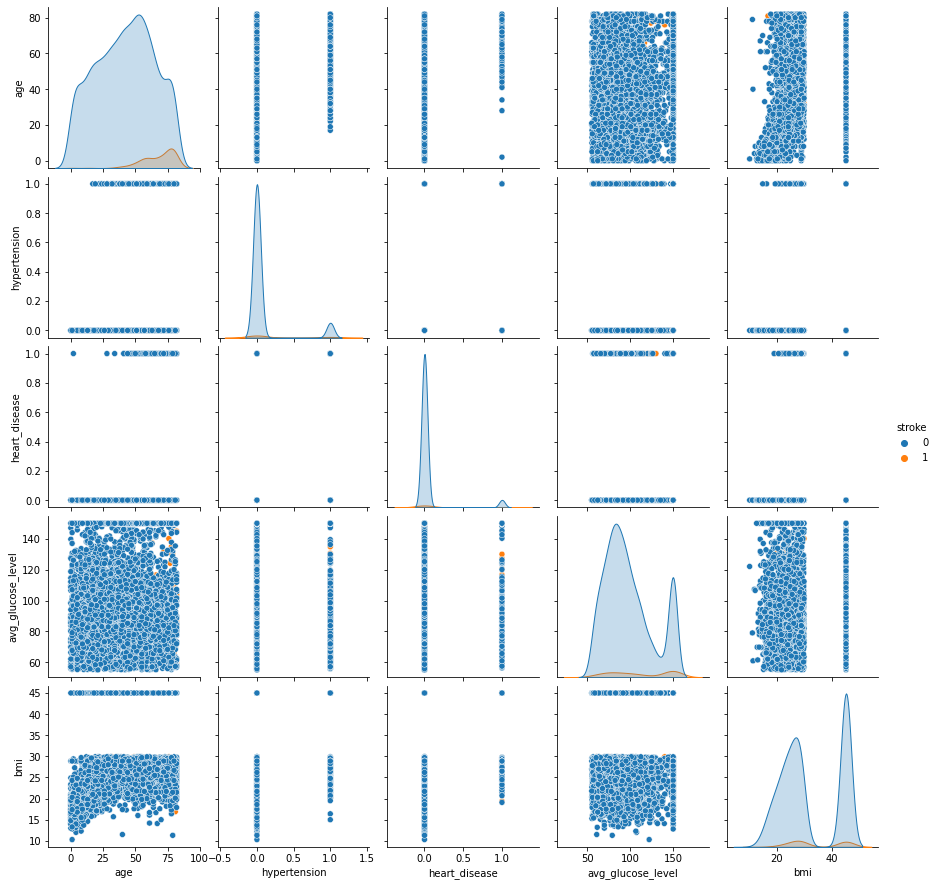

In [261]:
sns.pairplot(stroke, hue='stroke')

Debido a las características de nuestras variables (categóricas) el uso de un pairplot dificulta el análisis de la información por lo que se dio prioridad al análisis de cada de una de las variables contra la target individualmente a fin de obtener la mayor información posible

#### 3.3.4  Insights del análisis Multivariado
* Uno de los factores de riesgo de tener un infarto cerebral es la edad del paciente, lo cual sí se confirma en nuestra muestra. Sin embargo también es común que los hombres son los que presenten más casos lo cual no se compruba en nuestros pacientes
* Cuando consideramos más de un aspecto en el estilo de vida de los pacientes los casos de antecedentes de infarto cerebral aumentan. Específicamente se incrementan para aquellos pacientes que están casados, los que nunca han fumado y los que viven en zonas urbanas.
* Cuando los pacientes tienen más de una enfermedad al mismo tiempo los casos de infarto cerebral disminuyen. Esto podría confirmar que lo que influye más en la probabilidades de un infarto cerebral esta más relacionado con el estilo de vida del paciente que con sus enfermedades preexistentes

### 3.4 Conclusiones del Análisis Exploratorio o EDA

**Sobre el dataset**
* Conservamos una muestra de 5,109 pacientes con información completa (sin presencia de datos faltantes)
* En las variables de niveles de glucosa e índice de masa corporal tenemos casos importantes de outliers que se corrigieron para evitar que sesguen el modelo
* Tenemos 3 variables numéricas y 8 variables categóricas

&nbsp;**Sobre los pacientes**
* Hay más mujeres que hombres en la muestra. Sin embargo, el género no incrementa los casos de infartos cerebrales
* La edad promedio de los pacientes es de 43 años, aunque la mayoría de los pacientes son adultos mayores
* El promedio de los pacientes tiene sobrepeso y enfermedades del corazón. Tener dos enfermedades al mismo tiempo disminuye los casos con antecedentes de infartos cerebrales.
* La distribución de los pacientes en zonas urbanas y rurales es muy similar. Su lugar de residencia no influye en los casos de antecedentes de infartos cerebrales.
* Cuando consideramos más de un aspecto en el estilo de vida de los pacientes los casos de antecedentes de infarto cerebral aumentan. Específicamente se incrementan para aquellos pacientes que están casados, los que nunca han fumado y los que viven en zonas urbanas.
* Cuando los pacientes tienen más de una enfermedad al mismo tiempo los casos de infarto cerebral disminuyen. Las enfermedades que más aumentan los casos de infartos cerebrales son diabetes, niveles bajos de glucosa, hipertensión y enfermedades del corazón (tal y cómo lo reportan las investigaciones médicas)
* El estilo de vida de los pacientes aumenta más los casos de antecedentes de infarto cerebral que la combinación de enfermedades en su estado de salud


## 4. Modelos

### 4.1 Prepación del dataset para el modelado

#### 4.1.1 Get dummy

**A** Debido a que algunas de nuestras variables tienen más de dos resultados, vamos a usar la función get_dummies para separar cada resultado en una columna.
En este caso por practicidad aplicaremos el cambio a toda la base


In [262]:
#Usamos get_dummies para la codificación categórica, es un proceso en el que transformamos datos categóricos 
#en datos numéricos

#convertir en columnas binarias con 2 resultados
columns_obj = ["gender", "ever_married" , "Residence_type"]
from sklearn import preprocessing
encoding = preprocessing.LabelEncoder()
for col in columns_obj:
    stroke[col]=  encoding.fit_transform(stroke[col])

#convert in 0 and 1 the rest of columns    
stroke = pd.get_dummies(stroke)

**B** Verifico el cambio en las variables

In [263]:
stroke.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,...,grupo_edad_adultos,grupo_edad_adultos mayores,nivel_glucosa_hipoglucemia,nivel_glucosa_normal,nivel_glucosa_prediabetes,nivel_glucosa_diabetes,nivel_imc_Peso bajo,nivel_imc_Normal,nivel_imc_Sobrepeso,nivel_imc_Obesidad
id,,,,,,,,,,,,,,,,,,,,,
9046,1,67,0,1,1,1,150.0,45.00000,1,0,...,0,1,0,0,0,1,0,0,0,1
51676,0,61,0,0,1,0,150.0,28.89456,1,0,...,1,0,0,0,0,1,0,0,1,0


In [264]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int32  
 1   age                             5109 non-null   int32  
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int32  
 5   Residence_type                  5109 non-null   int32  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_Self-employed       

**C** Para el modelaje usaremos las variables agrupadas del nivel de glucosa, índice de masa corporal y edad para un mejor análisis por lo que las variables de donde se desglosa la información no son necesarias. Las eliminamos

In [265]:
stroke.drop(['age','avg_glucose_level','bmi'], axis=1, inplace=True)

In [266]:
#Verifico
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender                          5109 non-null   int32
 1   hypertension                    5109 non-null   int64
 2   heart_disease                   5109 non-null   int64
 3   ever_married                    5109 non-null   int32
 4   Residence_type                  5109 non-null   int32
 5   stroke                          5109 non-null   int64
 6   work_type_Govt_job              5109 non-null   uint8
 7   work_type_Never_worked          5109 non-null   uint8
 8   work_type_Private               5109 non-null   uint8
 9   work_type_Self-employed         5109 non-null   uint8
 10  work_type_children              5109 non-null   uint8
 11  smoking_status_Unknown          5109 non-null   uint8
 12  smoking_status_formerly smoked  5109 non-null   uint8
 13 

#### 4.1.3 Oversampling 

Debido a que nuestra base tiene un problema de desabalanceo porque en la variable objetivo hay más pacientes sin antecedente de ACV (0) que pacientes que sí lo tienen (1) lo que puede provocar que el modelo sobreaprenda a predecir los pacientes que no podrían tener ACV (variable mayoritaria) por lo que antes de modelar vamos a corregirlo a través de SMOTE

In [267]:
#Aplicamos la tecnica SMOTE para Oversampling y lograr balancear el dataset

from imblearn.over_sampling import SMOTE

#separamos las etiquetas y el objetivo
X = stroke.drop(columns = ['stroke'])
#target
y = stroke['stroke']

#oversample data
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Tamaño de X antes SMOTE:{X.shape}
Tamaño de X después SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Distribución de la variable objetivo antes SMOTE:\n{y.value_counts(normalize=True)}
Distribución de la variable objetivo después SMOTE:\n{y_sm.value_counts(normalize=True)}''')

Tamaño de X antes SMOTE:(5109, 26)
Tamaño de X después SMOTE:(9720, 26) 


Distribución de la variable objetivo antes SMOTE:
0    0.951262
1    0.048738
Name: stroke, dtype: float64
Distribución de la variable objetivo después SMOTE:
1    0.5
0    0.5
Name: stroke, dtype: float64


#### 4.1.2 PCA

Nuestro modelo ahora presenta la maldición de la dimensionalidad ya que aplicar el método de Get Dummy el número de variables que se consideran aumento considerablemente sin que ello necesariamente impacte positivamente en la predicción. Es por eso que se aplicará el Análisis de Componentes Principales (PCA)

In [268]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
X = StandardScaler().fit_transform(X_sm)

#PCA
pca = PCA(n_components=0.90)
principalComponents = pca.fit_transform(X)


print('Tamaño de la X antes de PCA',X_sm.shape)
print('Tamaño de la base después de PCA',principalComponents.shape)

Tamaño de la X antes de PCA (9720, 26)
Tamaño de la base después de PCA (9720, 17)


Utilizando el análisis de PCA redujimos el 35% de las variables, pasando de 26 a 17 variables.

In [269]:
#¿Cuánto de la varianza se esta explicando con las 17 variables que se quedaron después de PCA?
varianza_explicada = pca.explained_variance_ratio_
print('suma:',sum(varianza_explicada[0:17]))

suma: 0.9126358019521018


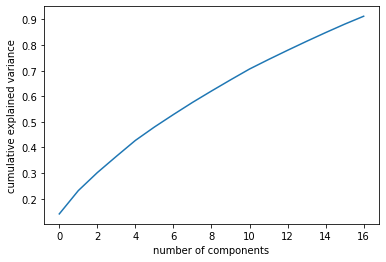

In [270]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Conclusión**: Después de PCA mantenemos solo 17 variables con las cuales se abarca el 91% de la información

#### 4.1.4 Correlaciones

Revisamos las correlaciones de nuestras variables con nuestra target

In [271]:
pd.options.display.max_rows= None
#correlaciones= stroke.corr(method='pearson')
correlaciones= stroke.corr(method='pearson').iloc[:,5].sort_values(ascending= False)
correlaciones

stroke                            1.000000
grupo_edad_adultos mayores        0.247121
heart_disease                     0.134905
hypertension                      0.127891
ever_married                      0.108299
nivel_glucosa_diabetes            0.104461
nivel_imc_Sobrepeso               0.071485
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
Residence_type                    0.015415
work_type_Private                 0.011927
gender                            0.009081
smoking_status_smokes             0.008920
nivel_imc_Obesidad                0.008303
work_type_Govt_job                0.002660
smoking_status_never smoked      -0.004163
work_type_Never_worked           -0.014885
nivel_glucosa_hipoglucemia       -0.016342
nivel_glucosa_prediabetes        -0.016799
nivel_imc_Normal                 -0.054107
smoking_status_Unknown           -0.055924
nivel_imc_Peso bajo              -0.056489
nivel_glucosa_normal             -0.062789
grupo_edad_

In [272]:
pd.options.display.max_rows=15

De acuerdo con la información de las correlaciones de nuestras variables con la variable objetivo podemos obtener las siguientes conclusiones:
* **Variables con MAYOR correlación positiva**: adultos mayores, pacientes con enfermedades del corazón, pacientes con hipertensión, estado civil y pacientes con diabetes 
* Variables con menor correlación positiva: empleados que trabajan en el gobierno, tienen obesidad, pacientes que fumaban en el pasado y genero 
* **Variables con MAYOR correlación negativa**: pacientes en edad adulta, jóvenes y niños, así como pacientes con niveles normales de glucosa
* Variables con menor correlación negativa: pacientes que nunca han fumado ni trabajado, tienen niveles muy bajos de glucosa (hipoglucemia) o prediabetes

### 4.2 Algoritmos de Clasificación
Para este proyecto debido a que nuestra variable target es de tipo categórica nos enfrentamos ante un problema de clasificación para poder predecir la clase más probable de un elemento en función del conjunto de variables que tenemos. En este caso específicamente buscamos predecir la probabilidad de que un paciente tenga un ACV. 

#### 4.2.1 Árbol de decisión

In [273]:
#Comenzamos importando todas las librerías necesarias para ejecutar el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

**Preprocesamiento: Selección de features, separación en entrenamiento y testeo**

In [274]:
#Definimos las variables del modelo
random_seed = 48
X = principalComponents
y = y_sm

#Crear la matriz de entrenamiento y testeo utilizando una partición del 75% y 25% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=random_seed)

#Vemos las dimeneciones de las matrices de entrenamiento y testeo
print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (7290, 17)
Dimensión de la matriz de features para testeo: (2430, 17)


**Identificamos los mejores hiperparametros para el modelo**

In [275]:
###### StratifiedKFold
# La validación cruzada k-fold significa que el conjunto de datos se divide en un número K. 
# Divide el conjunto de datos en el punto en el que el conjunto de pruebas utiliza cada pliegue

from sklearn.model_selection import StratifiedKFold

cv_stroke = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)

#####GridSearchCV
#Usamos GridSearchCV porque los parametros que queremos conocer no son continuos (sino usariamos RandomizedSearchCV)

#Importamos la libreria de GridSearchCV
from sklearn.model_selection import GridSearchCV

#Creamos nuestro objeto dtc
dtc = DecisionTreeClassifier()

#Definicion de Hyperparámetros
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
              'splitter': ['best','random'],
              'max_leaf_nodes':np.arange(2,17)}

#Utilizamos la grilla definida anteriormente...
model= GridSearchCV(dtc, param_grid=param_grid,error_score='raise', cv=cv_stroke)

#Entrenamos nuestro modelo de DecisionTreeClassifier con la grilla ya definida y CV con tamaño de Fold=5
model.fit(X_train, y_train)

#Vemos cuales serían los mejores parametros
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'criterion': 'gini', 'max_leaf_nodes': 16, 'splitter': 'best'}
Mejor Score: 0.7832665964172814



**Creación, ajuste y predicción del modelo**

In [276]:
# Entrenamiento del modelo 
arbol = GridSearchCV(estimator=dtc, 
                     param_grid={'criterion':['gini'], 
                                 'max_leaf_nodes':[16], 
                                 'splitter':['best']}, 
                     error_score='raise',
                     cv=cv_stroke)

arbol.fit(X_train, y_train)

# Calculamos las predicciones
predictions = arbol.predict(X_test)

##### 4.2.1.3  Matriz de confusión Árbol de decisión
La matriz de confusión nos permite evaluar el rendimiento de un modelo de clasificación. Las columnas muestran el número de predicciones de cada clase y las filas los valores reales. El significado de cada cuadrante en la matriz es:
* **Verdadero positivo**: El valor real es positivo y la prueba predijo también que era positivo. 
* **Verdadero negativo**: El valor real es negativo y la prueba predijo también que el resultado era negativo. 
* **Falso negativo**: El valor real es positivo, y la prueba predijo que el resultado es negativo. Esto es lo que en estadística se conoce como error tipo II
* **Falso positivo**: El valor real es negativo, y la prueba predijo que el resultado es positivo. Esto es lo que en estadística se conoce como error tipo I

 ![Imagen](https://interactivechaos.com/sites/default/files/inline-images/confusion_matrix_sklearn.png)

C:\Users\alici\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


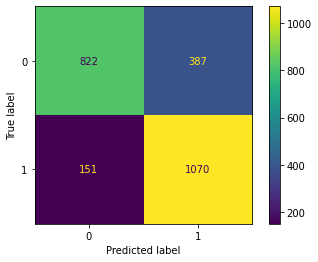

In [277]:
#Matriz de confusión para nuestro modelo
plot_confusion_matrix(arbol, X_test, y_test)
plt.show()

A través de la matriz de confusión podemos identificar que el modelo está acertando en los resultados del cuadrante de verdadero negativo lo que significa que esta acertando en todos los casos en los que los pacientes no tienen antecedentes de ACV mientras que en los casos en los que hay antecedente de ACV y el modelo logro predecirlo (verdadero positivo) no acertó en ninguno.

##### 4.2.1.4 Metricas del modelo Árbol de decisión

Accuracy del modelo es: 0.7786008230452675
La precisión del modelo es: 0.7343857240905971
Recall Score del modelo es: 0.8763308763308764
F1 Score del modelo es: 0.7991038088125466
AUC for our classifier is: 0.8216810313584507


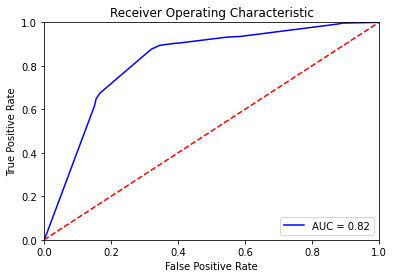

In [278]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, predictions)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, predictions)}")


#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = arbol.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### 4.2.1.5 Conclusiones del modelo Árboles de decisión

* **Exactitud: 77.86%** La exactitud del modelo es bastante buena. El modelo está encontrando 1,070 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 73.73%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 76% de los casos lo hace correctamente
* **Sensibilidad: 87.63%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 88% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 79.91%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel aceptable
* **AUC: 0.8216** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. Es un nivel bastante alto lo que es bueno

#### 4.2.2 Regresión Logistica

In [279]:
#Importo las librerias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

#Defino las variables que voy a utilizar para el modelo
random_seed = 48
features= stroke.drop(['stroke'], axis=1)
target =stroke['stroke']

#Defino la matriz X y Y
#Para este modelo no vamos a aplicar el PCA porque el modelo ofrece mejores resultados cuando se consideran todas las variables
X = X_sm
y = y_sm

#Creo la matriz de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=random_seed)

#Diseño el modelo y creo la matriz de confusión
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)

print(f"Confusion Matrix :- \n {confusion_matrix(y_test,y_lr_pred)}")
#print(f"Classiication Report : -\n {classification_report(y_test, y_lr_pred)}")

Confusion Matrix :- 
 [[1106  103]
 [ 156 1065]]


**Para el modelo de regresión logística no se aplicó la metodología de mejora de hiperpramatros porque el modelo consigue mejores métricas de exactitud, presión y sensibilidad cuando los parámetros son por default que cuando se intentan cambiar.** 

##### 4.2.2.1 Metricas del modelo

Accuracy del modelo es: 0.8934156378600823
La precisión del modelo es: 0.9118150684931506
Recall Score del modelo es: 0.8722358722358723
F1 Score del modelo es: 0.8915864378401005
AUC for our classifier is: 0.957968457968458


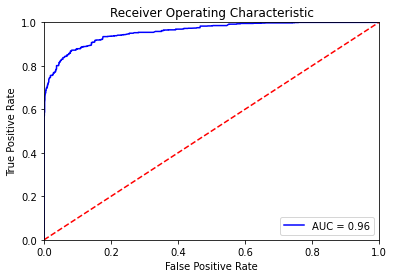

In [280]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, y_lr_pred)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, y_lr_pred)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, y_lr_pred)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, y_lr_pred)}")


#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = lr.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### 4.2.2.1 Conclusiones regresión Logistica

* **Exactitud: 89.34%** La exactitud del modelo es bastante buena. El modelo está encontrando 1,065 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 91.18%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 91% de los casos lo hace correctamente
* **Sensibilidad: 87.22%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 87% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 89.15%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel muy bueno
* **AUC: 0.9579** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. El nivel en comparación con el Árbol de decisión mejoro bastante. 

#### 4.2.3 Random Forest- Bagging 

In [281]:
#Importo las librerias necesarias
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Defino la matriz X y Y
random_seed = 48
X = principalComponents
y = y_sm

#Creo la matriz de entrenamiento
(X_train, X_test,y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.25,
                                    random_state=11)

**Identificamos los mejores hiperparametros para el modelo**

Por cuestiones de memoria RAM  no se pudo aplicar la mejora de los hiperparametros para el modelo de Random Forest. Sin embargo con los parámetros que se tienen definidos obtenemos un buen resultado

In [282]:
# #Importamos la libreria de GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Creamos nuestro objeto dtc
# rfc = RandomForestClassifier()

# Definicion de Hyperparámetros
# param_grid = {'n_estimators':np.arange(2,250),
#               'class_weight':['balanced', 'balanced_subsample'],
#               'max_features':['sqrt', 'log2', None],
#               'criterion':['gini', 'entropy', 'log_loss'],
#               'max_depth':np.arange(2,20)}

# #Utilizamos la grilla definida anteriormente...
# model= GridSearchCV(rfc, param_grid=param_grid,error_score='raise')

# #Entrenamos nuestro modelo de DecisionTreeClassifier con la grilla ya definida y CV con tamaño de Fold=5
# model.fit(X_train, y_train)

# #Vemos cuales serían los mejores parametros
# print("Mejores parametros: "+str(model.best_params_))
# print("Mejor Score: "+str(model.best_score_)+'\n')

**Creación, ajuste y predicción del modelo**

In [283]:
#Creamos un random forest
model = RandomForestClassifier(random_state=11, 
                               n_estimators=200,
                               class_weight="balanced", 
                               max_features="log2")
model.fit(X_train, y_train)

#Prediccion en Test
y_test_pred = model.predict(X_test) 

C:\Users\alici\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


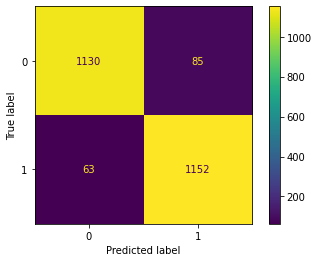

In [284]:
#Matriz de confusión
plot_confusion_matrix(model, X_test, y_test)
plt.show()

##### 4.2.3.1 Metricas del modelo

Accuracy del modelo es: 0.9390946502057613
La precisión del modelo es: 0.931285367825384
Recall Score del modelo es: 0.9481481481481482
F1 Score del modelo es: 0.9396411092985318
AUC for our classifier is: 0.9806716455824823


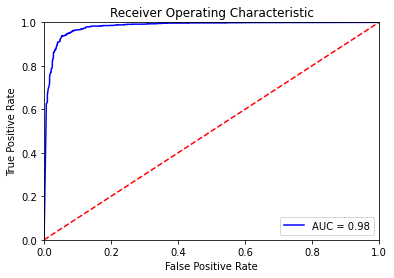

In [285]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, y_test_pred)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, y_test_pred)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, y_test_pred)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, y_test_pred)}")

#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### 4.2.3.2 Conclusiones del Random Forest

* **Exactitud: 93.90%** La exactitud del modelo es muy buena. El modelo está encontrando 1,152 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 93.12%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 93% de los casos lo hace correctamente
* **Sensibilidad: 94.81%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 95% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 93.96%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel excelente
* **AUC: 0.9806** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. En relación a los dos modelos anteriores el mejor nivel y es bastante bueno 

#### 4.2.4 Boosting

##### 4.2.4.1 Adaboost

In [286]:
#Importar la libreria
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

#Defino la matriz X y Y
random_seed = 48
X = principalComponents
y = y_sm

#Creo la matriz de entrenamiento
(X_train, X_test,y_train, y_test) = train_test_split(X,
                                                     y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     random_state=11)

**Identificamos los mejores hiperparametros para el modelo**

A fin de mejorar el tiempo de ejecución del código la siguiente línea esta marcada como comentario. Sin embargo, en su momento se ejecuto y se obtuvieron los resultados que abajo se muestran

In [287]:
# ###### StratifiedKFold
# # La validación cruzada k-fold significa que el conjunto de datos se divide en un número K. 
# # Divide el conjunto de datos en el punto en el que el conjunto de pruebas utiliza cada pliegue

# from sklearn.model_selection import StratifiedKFold

# cv_stroke = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)

# #####GridSearchCV
# #Usamos GridSearchCV porque los parametros que queremos conocer no son continuos (sino usariamos RandomizedSearchCV)

# #Importamos la libreria de GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Creamos nuestro objeto dtc
# abc = AdaBoostClassifier()

# #Definicion de Hyperparámetros
# # param_grid = {'n_estimators': np.arange(50,100),
# #               'learning_rate':np.arange(0.1,1,step=0.1)}

# param_grid = {'n_estimators': np.arange(50,110, step=20),
#               'learning_rate':np.arange(0.1,1,step=0.2)}

# #Utilizamos la grilla definida anteriormente...
# model= GridSearchCV(abc, param_grid=param_grid,error_score='raise', cv=cv_stroke)

# #Entrenamos nuestro modelo de DecisionTreeClassifier con la grilla ya definida y CV con tamaño de Fold=5
# model.fit(X_train, y_train)

# #Vemos cuales serían los mejores parametros
# print("Mejores parametros: "+str(model.best_params_))
# print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'learning_rate': 0.9000000000000001, 'n_estimators': 90}
Mejor Score: 0.8577446183953035

In [288]:
# Creamos un AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=90,learning_rate=0.9)

#Fiteamos el modelo
model = ada.fit(X_train, y_train)

#Predicción
y_test_pred = model.predict(X_test)

#Exactitud
print("Exactitud:",metrics.accuracy_score(y_test, y_test_pred))

Exactitud: 0.8592592592592593


C:\Users\alici\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


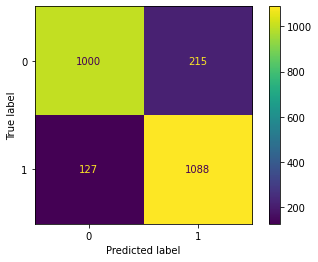

In [289]:
#Matriz de confusión
plot_confusion_matrix(model, X_test, y_test)
plt.show()

###### 4.2.4.1.1 Metricas del modelo

Accuracy del modelo es: 0.8592592592592593
La precisión del modelo es: 0.8349961627014582
Recall Score del modelo es: 0.8954732510288066
F1 Score del modelo es: 0.8641779189833202
AUC for our classifier is: 0.932187505292215


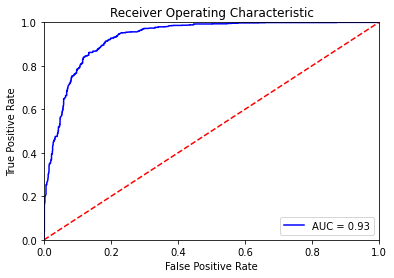

In [290]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, y_test_pred)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, y_test_pred)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, y_test_pred)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, y_test_pred)}")

#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### 4.2.4.1.2 Conclusiones del Adaboost

* **Exactitud: 85.92%** La exactitud del modelo es muy buena. El modelo está encontrando 1,088 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 83.49%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 93% de los casos lo hace correctamente
* **Sensibilidad: 89.54%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 90% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 86.41%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel excelente
* **AUC: 0.9321** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. En relación a los dos modelos anteriores el mejor nivel y es bastante bueno 

##### 4.2.4.2 Gradient Boosting

In [291]:
#Importar la libreria
from sklearn.ensemble import GradientBoostingClassifier

#Defino la matriz X y Y
#Para este modelo aplicar la metodología de PCA no mejora la presición por eso no lo vamos a utilizar
random_seed = 48
X = X_sm
y = y_sm

#Creo la matriz de entrenamiento
(X_train, X_test,y_train, y_test) = train_test_split(X,
                                                     y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     random_state=11)

**Identificamos los mejores hiperparametros para el modelo**

**Por cuestiones de memoria RAM  no se pudo aplicar la mejora de los hiperparametros para el modelo de Random Forest. Sin embargo con los parámetros que se tienen definidos obtenemos un buen resultado**

In [292]:
# ###### StratifiedKFold
# from sklearn.model_selection import StratifiedKFold

# cv_stroke = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)

# #####GridSearchCV
# #Usamos GridSearchCV porque los parametros que queremos conocer no son continuos (sino usariamos RandomizedSearchCV)

# #Importamos la libreria de GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Creamos nuestro objeto dtc
# gbc = GradientBoostingClassifier()

# #Definicion de Hyperparámetros
# param_grid = {'random_state': np.arange(0,60,step=15),
#               'n_estimators':np.arange(100,500,step=100)}

# #Utilizamos la grilla definida anteriormente...
# model= GridSearchCV(gbc, param_grid=param_grid,error_score='raise', cv=cv_stroke)

# #Entrenamos nuestro modelo de DecisionTreeClassifier con la grilla ya definida y CV con tamaño de Fold=5
# model.fit(X_train, y_train)

# #Vemos cuales serían los mejores parametros
# print("Mejores parametros: "+str(model.best_params_))
# print("Mejor Score: "+str(model.best_score_)+'\n')

In [293]:
# Creamos el modelo
gbrt = GradientBoostingClassifier(random_state = 0)

#Fiteamos el modelo
model = gbrt.fit(X_train, y_train)

#Predicción
y_test_pred = model.predict(X_test)

#Exactitud
print("Exactitud:",metrics.accuracy_score(y_test, y_test_pred))

Exactitud: 0.8617283950617284


C:\Users\alici\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


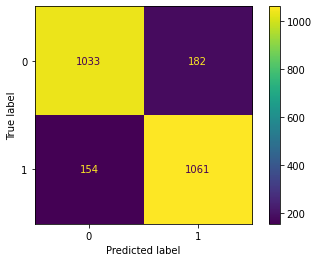

In [294]:
#Matriz de confusión
plot_confusion_matrix(model, X_test, y_test)
plt.show()

###### 4.2.4.2.1 Metricas del modelo

Accuracy del modelo es: 0.8617283950617284
La precisión del modelo es: 0.8535800482703138
Recall Score del modelo es: 0.8732510288065843
F1 Score del modelo es: 0.8633034987794955
AUC for our classifier is: 0.9337353723179055


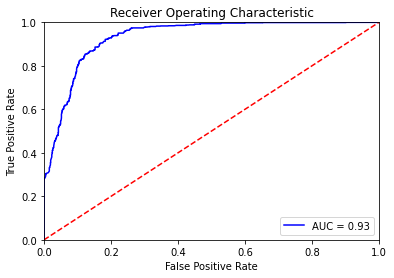

In [295]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, y_test_pred)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, y_test_pred)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, y_test_pred)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, y_test_pred)}")

#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### 4.2.4.2.2 Conclusiones de Gradient Boosting

* **Exactitud: 86.17%** La exactitud del modelo es muy buena. El modelo está encontrando 1,061 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 85.35%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 93% de los casos lo hace correctamente
* **Sensibilidad: 87.32%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 87% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 86.33%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel excelente
* **AUC: 0.9337** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. En relación a los dos modelos anteriores el mejor nivel y es bastante bueno 

##### 4.2.4.3 Light GBM

In [296]:
#Importar la libreria
import lightgbm as lgb

#Defino la matriz X y Y
random_seed = 48
X = principalComponents
y = y_sm

#Creo la matriz de entrenamiento
(X_train, X_test,y_train, y_test) = train_test_split(X,
                                                     y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     random_state=11)

**Para el modelo de Light GBM no se aplicó la metodología de mejora de hiperpramatros porque el modelo consigue mejores métricas de exactitud, presión y sensibilidad cuando los parámetros son por default que cuando se intentan cambiar.**

In [297]:
# Creamos el modelo
# clf = lgb.LGBMClassifier(max_depth=2,n_estimators=150)
clf = lgb.LGBMClassifier()

#Fiteamos el modelo
model = clf.fit(X_train, y_train)

#Predicción
y_test_pred = model.predict(X_test)

#Exactitud
print("Exactitud:",metrics.accuracy_score(y_test, y_test_pred))

Exactitud: 0.939917695473251


C:\Users\alici\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


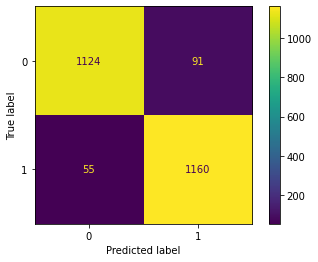

In [298]:
#Matriz de confusión
plot_confusion_matrix(model, X_test, y_test)
plt.show()

###### 4.2.4.3.1 Metricas del modelo

Accuracy del modelo es: 0.939917695473251
La precisión del modelo es: 0.9272581934452439
Recall Score del modelo es: 0.9547325102880658
F1 Score del modelo es: 0.940794809407948
AUC for our classifier is: 0.9796782333316398


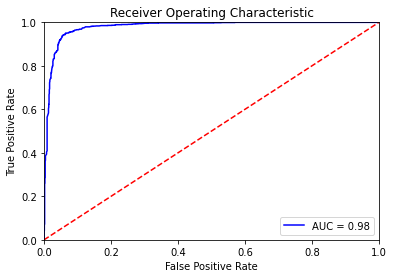

In [299]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, y_test_pred)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, y_test_pred)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, y_test_pred)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, y_test_pred)}")

#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### 4.2.4.3.2 Conclusiones de Light GBM

* **Exactitud: 93.99%** La exactitud del modelo es muy buena. El modelo está encontrando 1,160 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 92.72%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 93% de los casos lo hace correctamente
* **Sensibilidad: 95.47%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 95% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 94.07%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel excelente
* **AUC: 0.9796** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. En relación a los dos modelos anteriores el mejor nivel y es bastante bueno 

##### 4.2.4.4 Xgboost

In [300]:
#Importar la libreria
import xgboost as xgb

#Defino la matriz X y Y
random_seed = 48
X = principalComponents
y = y_sm

#Creo la matriz de entrenamiento
(X_train, X_test,y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.25,
                                    random_state=11)

**Identificamos los mejores hiperparametros para el modelo**

In [301]:
###### StratifiedKFold
from sklearn.model_selection import StratifiedKFold

cv_stroke = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)

#####GridSearchCV
#Usamos GridSearchCV porque los parametros que queremos conocer no son continuos (sino usariamos RandomizedSearchCV)

#Importamos la libreria de GridSearchCV
from sklearn.model_selection import GridSearchCV

#Creamos nuestro objeto dtc
xgbc = xgb.XGBClassifier()

#Definicion de Hyperparámetros
param_grid = {'n_estimators': np.arange(10,100,step=10),
              'learning_rate':np.arange(0.1,1)}

#Utilizamos la grilla definida anteriormente...
model= GridSearchCV(xgbc, param_grid=param_grid,error_score='raise', cv=cv_stroke)

#Entrenamos nuestro modelo de DecisionTreeClassifier con la grilla ya definida y CV con tamaño de Fold=5
model.fit(X_train, y_train)

#Vemos cuales serían los mejores parametros
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'learning_rate': 0.1, 'n_estimators': 90}
Mejor Score: 0.9208497666716845



In [302]:
# Creamos el modelo
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=90,seed=123)

#Fiteamos el modelo
model = clf_xgb.fit(X_train,y_train)

#Predicción!
y_test_pred = model.predict(X_test)

#Exactitud
print("Exactitud:",metrics.accuracy_score(y_test, y_test_pred))

Exactitud: 0.9395061728395062


C:\Users\alici\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


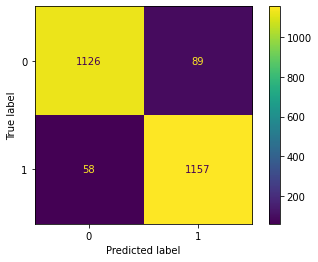

In [303]:
#Matriz de confusión
plot_confusion_matrix(model, X_test, y_test)
plt.show()

###### 4.2.4.4.1 Metricas del modelo

Accuracy del modelo es: 0.9395061728395062
La precisión del modelo es: 0.9285714285714286
Recall Score del modelo es: 0.9522633744855967
F1 Score del modelo es: 0.9402681836651767
AUC for our classifier is: 0.9802953479313791


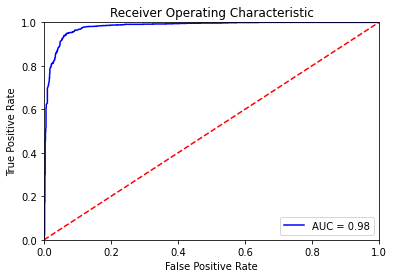

In [304]:
# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy del modelo es: {accuracy_score(y_test, y_test_pred)}")

# Precisión
from sklearn.metrics import precision_score
print(f"La precisión del modelo es: {precision_score(y_test, y_test_pred)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score del modelo es: {recall_score(y_test, y_test_pred)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score del modelo es: {f1_score(y_test, y_test_pred)}")

#Template CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### 4.2.4.4.2 Conclusiones de Xgboost

* **Exactitud: 93.95%** La exactitud del modelo es muy buena. El modelo está encontrando 1,157 verdaderos positivos (pacientes que el modelo predijo que podrían tener un ACV y realmente lo tenían)
* **Precisión: 92.85%** La precisión del modelo también tiene un buen nivel considerando que esta métrica mide la precisión de las predicciones tanto correctas como incorrectas en relación con todas las predicciones que hizo. Eso significa que de todas las predicciones que el modelo hace, en el 93% de los casos lo hace correctamente
* **Sensibilidad: 95.22%** La sensibilidad del modelo es de las métricas más importantes porque mide la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. Significa que en el 95% de los casos positivos que fueron detectados por el modelo realmente eran casos positivos. En otras palabras, es la proporción de casos que el modelo predijo que podrían tener un ACV y de verdad lo tenían en relación con aquellos que predijo que no tenían, pero en realidad sí.
* **F1 Score: 94.02%** El nivel de F1 hace sentido con las otras métricas del modelo y tiene un nivel excelente
* **AUC: 0.9802** El nivel de AUC nos habla sobre la exactitud que tiene el modelo para clasificar casos, pero de pacientes que podrían tener ACV. En relación a los dos modelos anteriores el mejor nivel y es bastante bueno 

## 5. Elección de modelo

In [305]:
#Creamos un dataframe con la información de los modelos para poder decidir cuál es modelo con las mejores metricas

datos = [[77.86, 73.73, 87.63, 79.91,0.8216],#Árbol de decisión
         [89.34, 91.18, 87.22, 89.15,0.9579],#Regresión Logistica
         [93.90, 93.12, 94.81, 93.96,0.9806],#Random Fores
         [85.92, 83.49, 89.54, 86.41,0.9321],#Adaboost
         [86.17, 85.35, 87.32, 86.33,0.9337],#Gradient Boosting
         [93.99, 92.72, 95.47, 94.07,0.9796], #Light GBM
         [93.95, 92.85, 95.22, 94.02,0.9802]]#Xgboost

metricas=['Exactitud','Precisión','Sensibilidad','Score F1','AUC']

tipos_modelos=['Árbol de decisión',
               'Regresión Logística',
               'Random Forest',
               'Adaboost',
               'Gradient Boosting',
               'Light GBM',
               'Xgboost']

modelos = pd.DataFrame(datos, columns=metricas, index=tipos_modelos)

print(modelos)

                     Exactitud  Precisión  Sensibilidad  Score F1     AUC
Árbol de decisión        77.86      73.73         87.63     79.91  0.8216
Regresión Logística      89.34      91.18         87.22     89.15  0.9579
Random Forest            93.90      93.12         94.81     93.96  0.9806
Adaboost                 85.92      83.49         89.54     86.41  0.9321
Gradient Boosting        86.17      85.35         87.32     86.33  0.9337
Light GBM                93.99      92.72         95.47     94.07  0.9796
Xgboost                  93.95      92.85         95.22     94.02  0.9802


**Elección del modelo**

&nbsp;Después de ejecutar todos los modelos y comparar sus métricas los que ofrecen mejores resultados en el Random Forest y Light GBM, sin embargo, en este caso nos quedaremos con **Light GBM** porque es el que tiene un mayor nivel de sensibilidad, la cual es la métrica más importante para el proyecto porque se refiere a la proporción de casos positivos que fueron correctamente identificados por el algoritmo. 